In [2]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('VBL.NS', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date         Open    High          Low        Close    Adj Close  \
244 2022-11-18  1150.800049  1153.0  1135.000000  1143.900024  1143.900024   
245 2022-11-21  1143.900024  1155.5  1096.650024  1103.300049  1103.300049   
246 2022-11-22  1109.500000  1160.0  1108.800049  1155.199951  1155.199951   
247 2022-11-23  1162.000000  1175.0  1138.000000  1164.500000  1164.500000   
248 2022-11-24  1165.150024  1180.0  1144.000000  1175.699951  1175.699951   

      Volume  
244  1177230  
245  1702184  
246  2002605  
247  1744564  
248  1319178  


In [3]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2021-11-25  607.533325
1 2021-11-26  589.233337
2 2021-11-29  581.633362
3 2021-11-30  594.299988
4 2021-12-01  593.933350


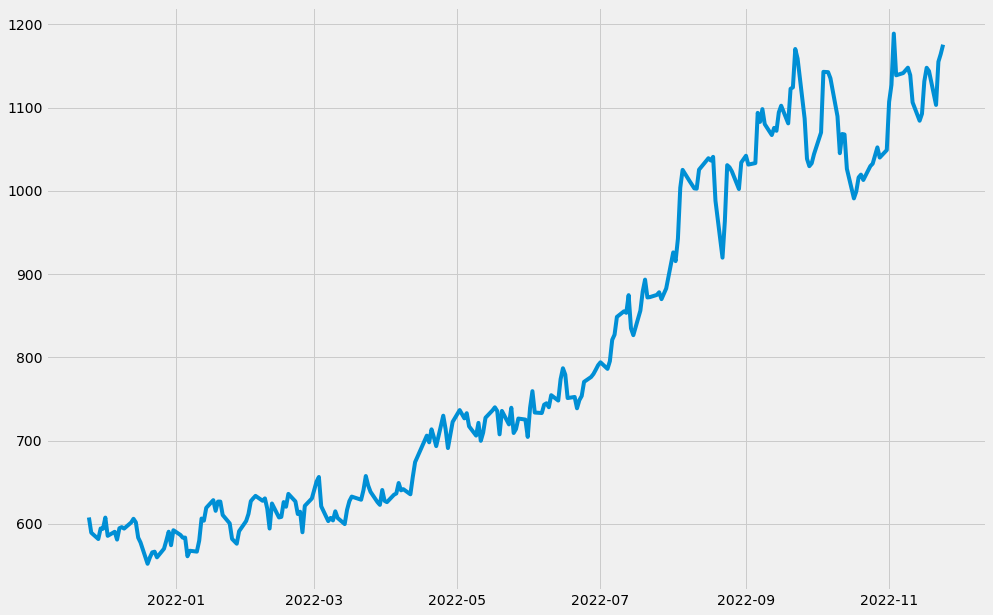

In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 432x288 with 0 Axes>

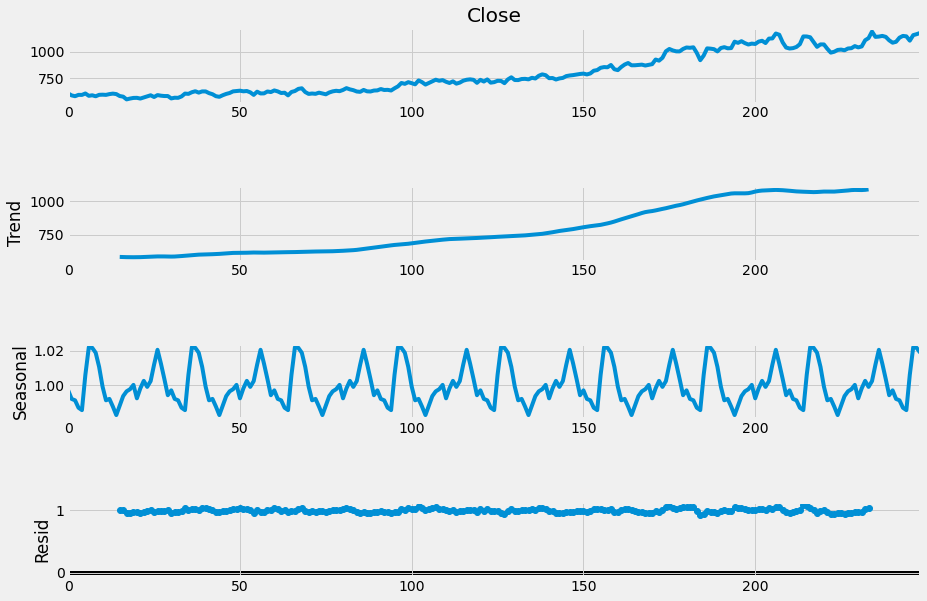

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative',period= 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

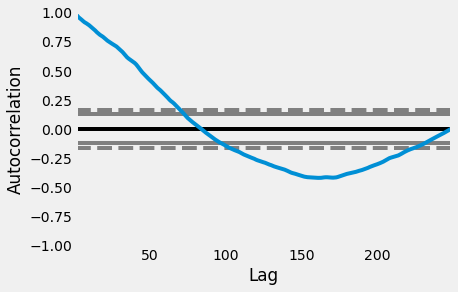

In [6]:
pd.plotting.autocorrelation_plot(data["Close"])

/Users/milind/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


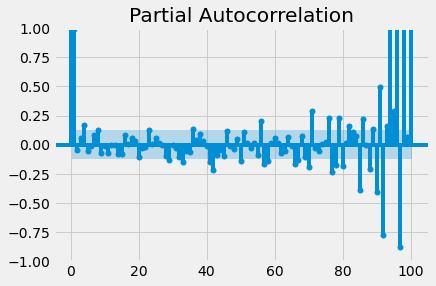

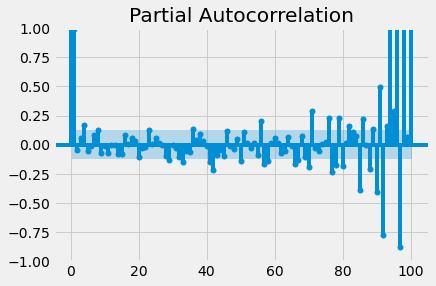

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [8]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())

/Users/milind/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/milind/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  249
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -1100.399
Date:                Fri, 25 Nov 2022   AIC                           2216.797
Time:                        13:40:27   BIC                           2244.905
Sample:                             0   HQIC                          2228.112
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3757      0.061     -6.170      0.000      -0.495      -0.256
ar.L2         -1.0036      0.069    -14.615      0.000      -1.138      -0.869
ar.L3         -0.1061      0.084     -1.264      0.2

/Users/milind/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
predictions = fitted.predict()
print(predictions)

0         0.000000
1       607.554288
2       587.794322
3       582.975025
4       598.402352
          ...     
244    1136.395058
245    1131.579206
246    1107.771753
247    1164.658260
248    1158.687186
Name: predicted_mean, Length: 249, dtype: float64


In [10]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],order=(p, d, q),seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/Users/milind/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/milind/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.38786D+00    |proj g|=  9.85104D-02

At iterate    5    f=  4.35726D+00    |proj g|=  2.09929D-02

At iterate   10    f=  4.33299D+00    |proj g|=  1.31782D-02

At iterate   15    f=  4.28801D+00    |proj g|=  3.07838D-02

At iterate   20    f=  4.28310D+00    |proj g|=  7.44351D-03

At iterate   25    f=  4.28221D+00    |proj g|=  3.39092D-03

At iterate   30    f=  4.28192D+00    |proj g|=  2.38269D-04

At iterate   35    f=  4.28191D+00    |proj g|=  5.75634D-04

At iterate   40    f=  4.28162D+00    |proj g|=  2.60566D-03

At iterate   45    f=  4.28105D+00    |proj g|=  1.23001D-02


/Users/milind/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  4.28049D+00    |proj g|=  7.01294D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     56      1     0     0   7.013D-03   4.280D+00
  F =   4.2804859767532992     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  249
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -1065.841
Date:                            Fri, 25 Nov 2022   AIC                           2161.6

In [11]:
predictions = model.predict(len(data), len(data)+20)
print(predictions)

249    1172.457373
250    1174.987820
251    1171.247322
252    1176.432776
253    1173.638382
254    1180.442993
255    1175.648925
256    1175.685383
257    1174.885167
258    1187.401910
259    1187.810941
260    1188.551528
261    1190.624867
262    1195.608128
263    1195.982881
264    1205.581500
265    1205.523584
266    1214.869313
267    1207.694114
268    1204.685482
269    1205.217855
Name: predicted_mean, dtype: float64


<AxesSubplot:>

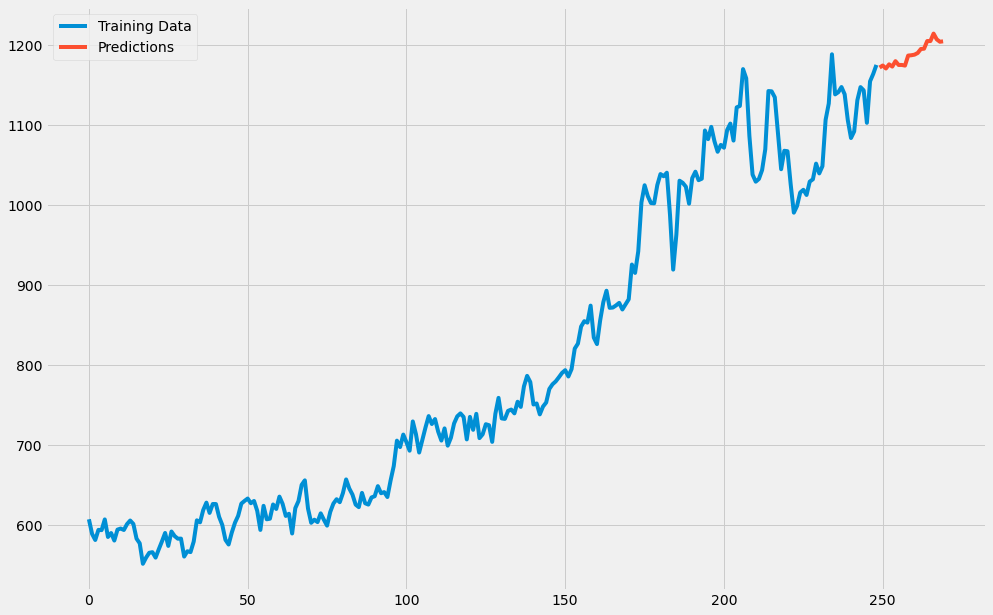

In [12]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")